## Hierarchical Clustering

### Aim
To cluster the data points using Agglomerative Hierarchical clustering method

### DataSet
Seed Dataset

### Source
UCI Repository

In [ ]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Seed_Data.csv")
data=data.drop("target",axis=1)

In [ ]:
X=np.array(data)

In [ ]:
# Nearest point
link1=linkage(data.values,method='single')

In [ ]:
# Farthest point
link2=linkage(data,method='complete')

In [ ]:
# UPGMA
link3=linkage(data,method='average')

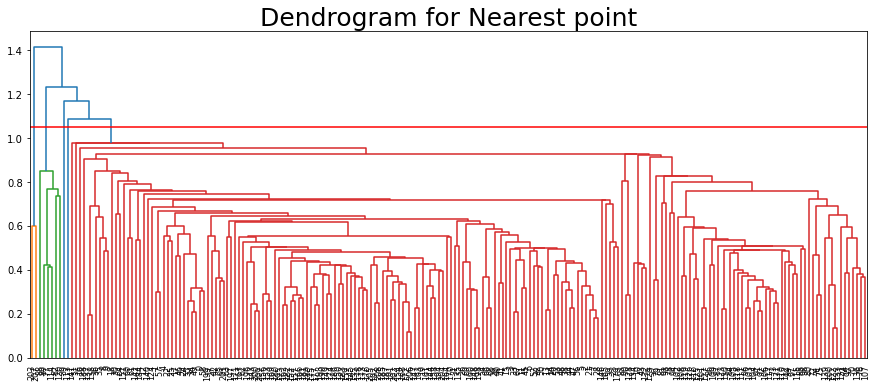

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Dendrogram for Nearest point",fontsize=25)
dendrogram(link1,leaf_rotation=90,leaf_font_size=8)
plt.axhline(y = 1.05, color = 'r', linestyle = '-')
plt.show()

In [ ]:
# Here the line passing through the clusters indicate that optimal
# number of clusters is 5

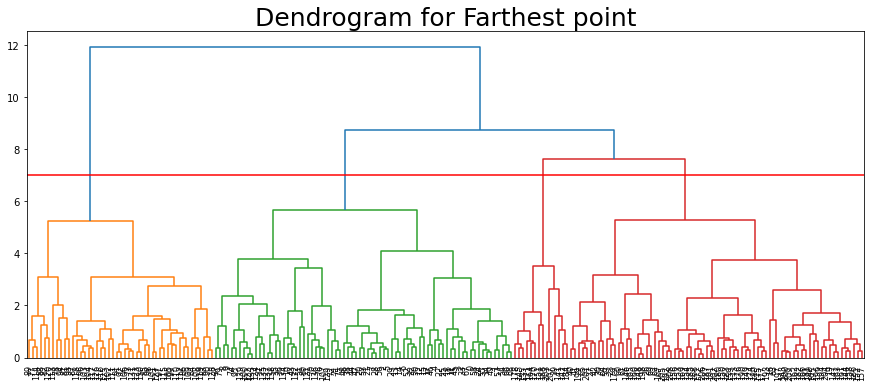

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Dendrogram for Farthest point",fontsize=25)
dendrogram(link2,leaf_rotation=90,leaf_font_size=8)
plt.axhline(y = 7, color = 'r', linestyle = '-')
plt.show()

In [ ]:
# Here the line passing through the clusters indicate optimal number
# of clusters is 4

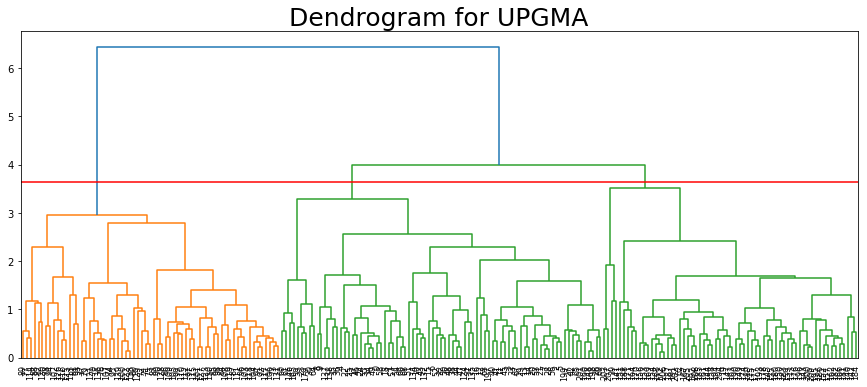

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Dendrogram for UPGMA",fontsize=25)
dendrogram(link3,leaf_rotation=90,leaf_font_size=8)
plt.axhline(y = 3.63, color = 'r', linestyle = '-')
plt.show()

In [ ]:
# The line that passes through the clusters indicate optimal number of clusters
# So here n_clusters is 3

In [ ]:
# Based on the dendrograms we can observe that for linkage methods nearest point
# and farthest point we have 4 clusters but using average method we get 3 clusters


In [ ]:
para={'affinity':['euclidean','l1','l2','manhattan'],
      'linkage':['complete','average','single']}
grd=GridSearchCV(AgglomerativeClustering(),para,scoring='accuracy')

In [ ]:
grd.fit(data)

GridSearchCV(estimator=AgglomerativeClustering(),
             param_grid={'affinity': ['euclidean', 'l1', 'l2', 'manhattan'],
                         'linkage': ['complete', 'average', 'single']},
             scoring='accuracy')

In [ ]:
grd.best_params_

{'affinity': 'euclidean', 'linkage': 'complete'}

In [ ]:
# We can observe that we have got the best parameters for agglomerative clustering is
# euclidean distance and linkage is complete
# So we will build one more model with n_clusters as 4 because for dendrogram
# using farthest point we have got optimal clusters as 4

In [ ]:
hc_complete=AgglomerativeClustering(n_clusters=4,linkage='complete',affinity='euclidean')

In [ ]:
hc_complete.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2])

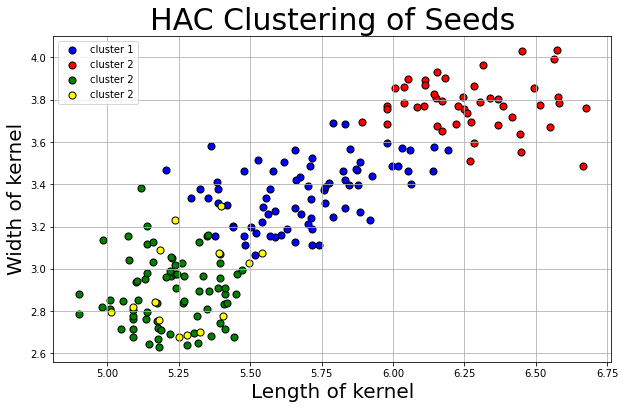

In [ ]:
X=np.array(data)
y=hc_complete.fit_predict(data)

# plot the 4 clusters
plt.figure(figsize=(10,6))
plt.scatter(
    X[y == 0, 3], X[y == 0, 4],
    c='blue',s=50,
    marker='o', edgecolor='black',
    label='cluster 1'
)


plt.scatter(
    X[y == 1, 3], X[y == 1, 4],
    c='red',s=50,
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y == 2, 3], X[y == 2, 4],
    c='green',s=50,
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y == 3, 3], X[y == 3, 4],
    c='yellow',s=50,
    marker='o', edgecolor='black',
    label='cluster 2'
)


plt.title("HAC Clustering of Seeds",fontsize=30)
plt.legend(scatterpoints=1)
plt.xlabel("Length of kernel",fontsize=20)
plt.ylabel("Width of kernel",fontsize=20)
plt.grid()
plt.show()

In [ ]:
# Conclusion

# We have first plotted dendrogram for nearest,farthest and average distance measures
#  and found the optimal clusters for each of them
# Then we did gridsearchcv to understand which parameter is the best for this model
# and found out that distance measure euclidean and linkage complete i.e average is the
# best for our model thus the optimal number of clusters become 4
# Now we have fit agglomerative clustering model with these parameters and plotted the
# points.